In [1]:
# Victor Z
# UW-Madison, 2024
# flow cytometer data

In [7]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
path = '/content/drive/MyDrive/StatsBookCode/Python/'
print(path)

/content/drive/MyDrive/StatsBookCode/Python/


In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Load flow cytometer data
filename = path+'Data/flow_cytometer.dat'
data = np.loadtxt(filename)

n = len(data)

FSC = data[:, 0]
SSC = data[:, 1]

minFSC = np.min(FSC)
maxFSC = np.max(FSC)

minSSC = np.min(SSC)
maxSSC = np.max(SSC)

print(minSSC)
print(maxSSC)
print(minFSC)
print(maxFSC)

3.6191
5.8543
4.2365
6.0834


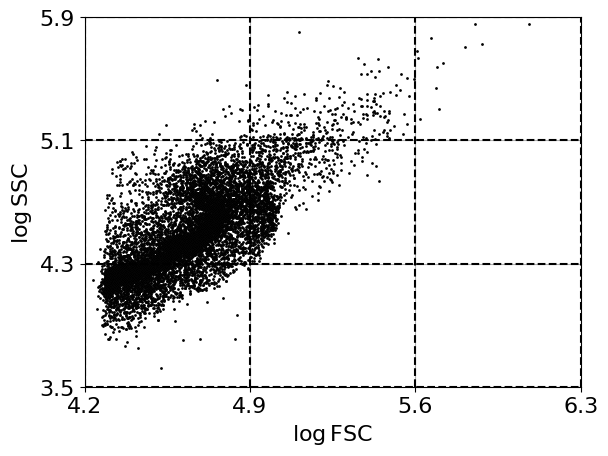

In [32]:
# Get joint pdf
plt.figure(1)
plt.plot(FSC, SSC, 'ko', markerfacecolor='w', markersize=1)
plt.xlabel('$\log \mathrm{FSC}$', fontsize=16)
plt.ylabel('$\log \mathrm{SSC}$', fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.grid(True)
plt.xlim(minFSC, maxFSC)
plt.ylim(minSSC, maxSSC)

SSCedges = [3.5,4.3,5.1,5.9]
FSCedges = [4.2,4.9,5.6,6.3]

# note that this generates different edges than Matlab code
m = 3
freq, SSCedges, FSCedges = np.histogram2d(SSC, FSC, bins=(SSCedges,FSCedges))
jointpdf = freq / n

for i in range(m + 1):
    xx = np.linspace(min(FSCedges), max(FSCedges), 100)
    plt.plot(xx, np.ones(100) * SSCedges[i], 'k--')

for j in range(m + 1):
    yy = np.linspace(min(SSCedges), max(SSCedges), 100)
    plt.plot(np.ones(100) * FSCedges[j], yy, 'k--')

plt.xticks(FSCedges)
plt.yticks(SSCedges)

plt.show()


In [33]:
print(freq)
print(SSCedges)
print(FSCedges)

[[2609.    0.    0.]
 [5996. 1116.    0.]
 [  28.  239.   12.]]
[3.5 4.3 5.1 5.9]
[4.2 4.9 5.6 6.3]


In [36]:
# Get marginal pdfs
freqmargFSC, FSCedgesmarg = np.histogram(FSC, bins=FSCedges)
marFSC = freqmargFSC / n

freqmargSSC, SSCedgesmarg = np.histogram(SSC, bins=SSCedges)
marSSC = freqmargSSC / n

print(marFSC)
print(marSSC)

[0.8633 0.1355 0.0012]
[0.2609 0.7112 0.0279]


([<matplotlib.axis.YTick at 0x7fefc02b6f20>,
 [Text(0, 3.5, '3.5'),
  Text(0, 4.3, '4.3'),
  Text(0, 5.1, '5.1'),
  Text(0, 5.9, '5.9')])

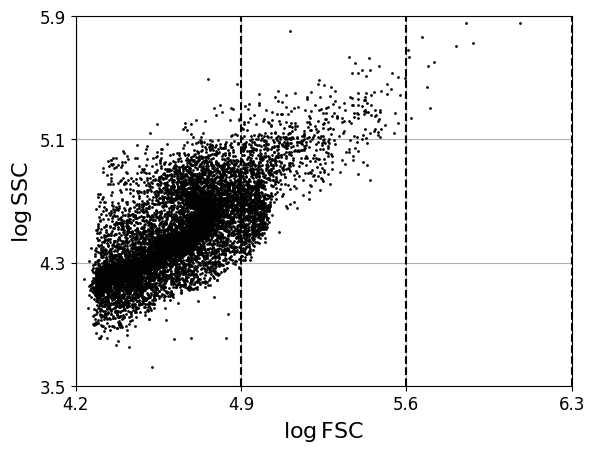

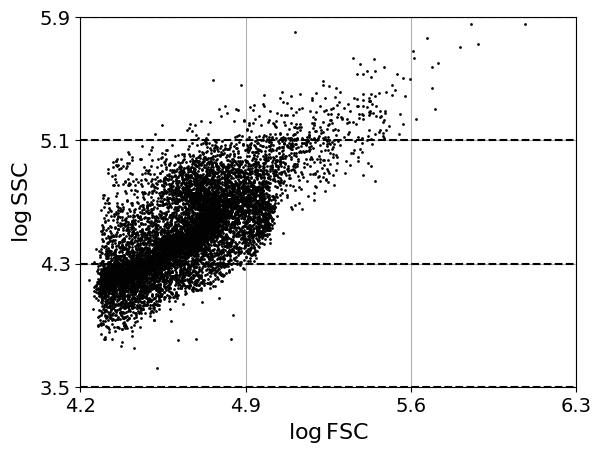

In [37]:
# Plot marginal pdfs
plt.figure(2)

plt.plot(FSC, SSC, 'ko', markerfacecolor='w', markersize=1)
plt.xlabel('$\log \mathrm{FSC}$', fontsize=16)
plt.ylabel('$\log \mathrm{SSC}$', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True)
plt.xlim(minFSC, maxFSC)
plt.ylim(minSSC, maxSSC)

for j in range(m + 1):
    yy = np.linspace(min(SSCedges), max(SSCedges), 100)
    plt.plot(np.ones(100) * FSCedges[j], yy, 'k--')
plt.xticks(FSCedges)
plt.yticks(SSCedges)

plt.figure(3)
plt.plot(FSC, SSC, 'ko', markerfacecolor='w', markersize=1)
plt.xlabel('$\log \mathrm{FSC}$', fontsize=16)
plt.ylabel('$\log \mathrm{SSC}$', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid(True)
plt.xlim(minFSC, maxFSC)
plt.ylim(minSSC, maxSSC)

for i in range(m + 1):
    xx = np.linspace(min(FSCedges), max(FSCedges), 100)
    plt.plot(xx, np.ones(100) * SSCedges[i], 'k--')
plt.xticks(FSCedges)
plt.yticks(SSCedges)

In [38]:
# Get conditional pdfs
condFSC = np.zeros((m, m))
condSSC = np.zeros((m, m))

for i in range(m):
    for j in range(m):
        condFSC[i, j] = jointpdf[i, j] / marSSC[i]
        condSSC[i, j] = jointpdf[i, j] / marFSC[j]


In [39]:
print(condFSC)
print(condSSC)

[[1.         0.         0.        ]
 [0.84308211 0.15691789 0.        ]
 [0.10035842 0.85663082 0.04301075]]
[[0.30221244 0.         0.        ]
 [0.69454419 0.82361624 0.        ]
 [0.00324337 0.17638376 1.        ]]
